In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import os

In [3]:
col_names = [
    'patient_id',
    'record_id',
    'date',
    'time',
    'staff',
    'hospital',
    'department',
    'staff_position',
    'nan',
    'event',
    'record_name',
    'record_text',
    'status',
    
]

In [4]:
ane_df = pd.read_excel(
    os.path.join("Aneurysm", 'Aneurysm.xlsx'),
    nrows=1000,
#     encoding='cp1251',
#     sep='\t',
    header=None
)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
ane_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221
0,N,NaN,NaN,Date of birth,1-клапан; 2- аорта; 3-АО+АК,Age,Age 2,"Sex, m=1, f=0",Weight,Growth,BMI,BSA,"Smoking, 1=Yes",Hypertens,АД мах сист,АД мах диаст,Systolic BP,Diastolic BP,Пульсовое АД,TAV,BAV,ATERos,CTD,ChReumD,Inf End,NaN,"MI, Q=1",NaN,NaN,NaN,ATERos 2,TAV 2,BAV 2,CTD 2,ChReumD 2,Inf End 2,KMNecros,бак\так,Echo1 (date),Aorta sinus,Aorta ascending,Aorta max,AS (dPmean),AS (dPmax),vmax,AVA,EF,IVS,Posterior Wall,масса М,ИММ,отс,End-Diast Dim,End-Sist Dim,MR,AR,PASP,Echo2 (date),Aorta sinus 2,Aorta ascending 2,Aorta max 2,AS (dPmean) 2,vmax2,AS (dPmax) 2,AVA 2,EF 2,PW 2,IVS 2,MMLV2,отс2,имм2,End-Diast D 2,End-Sist D 2,MR 2,AR 2,PASP 2,"Replacement, AV=1, MV=2, AV+MV=3, MV+TV=4",Heredity,Syncope,Chest Pain,Arrhythmia,Dyspnea,CHD(ХСН),"ИБС, 0=нет, 1=есть","ОНМК/ТИА, 0=нет, 1=ОНМК","Стенок. напр, 0=нет,1=1 ф.к, 2=2фк, 3=3фк, 4=п...",COPD,Respir Fail,HyperLip,GIT,"ФП, 0=нет, 1=ФП,",Diabetes,Without medicine=1,iACE,ARB,BB,CCB,Statins,Diuretics,AntiCoag,AntiAgg,Nitrates,Glycosides,Hb,RBC,WBC,PLT,ESR,CRP,Glucose,Creatinine,СКФ MDRD,Cholesterol,Triglyc,LDL,HDL,AC,Cor Angiogr,стеноз-КА да=1,LMCA-ствол,LAD,LCX,RCA,"РТСА, 0=нет, 1=да",Operation,Pacemaker Imp,акш,"пак-1,пак+акш-2, пак+аорта-3, аорта-4, акш+аор...",CT aorta дата из статистики,Ao sinus,Ao ascend,Ao max,BAV-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Type MiocPerf, R=1, L=2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЖЭ,внез смерть в семье,СМЭКГ мин ЧСС,СМЭКГ мах ЧСС,NaN,TR,Left Atrium,Ve,Va,Ve/Va,Tdec,УО1,TR 2,LA 2,Ve 2,Va 2,Ve/Va 2,Tdec 2,УО2,NaN,NaN,NaN,NaN,NaN,"умер нет-0, до операции-1, после-2",NaN,NaN,NaN,аор инд 1,АИндекс2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"диссекция, есть -1острая-2",obesity,AS,AR,CAD
1,1,NaN,NaN,NaN,NaN,22,NaN,0,105.99,190,29.3601,2.36515,0,0,120,80,120,80,40,0,0,0,1,0,0,NaN,0,NaN,2014-04-16 00:00:00,NaN,0,0,0,0,0,0,1,0,NaN,108,NaN,108,NaN,NaN,NaN,NaN,NaN,13,11,544.109,230.053,0.289157,83,58,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,4.96,62,122.781,4.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2014-04-16 00:00:00,NaN,NaN,4,2014-04-15 00:00:00,73,104,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.6631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
2,6,NaN,NaN,1961-01-29 00:00:00,NaN,52,NaN,1,107.6,192,29.1884,2.39555,1,1,180,130,110,70,40,0,1,1,0,0,0,NaN,0,NaN,2013-05-15 00:00:00,NaN,0,0,1,0,0,1,0,1,2009,47,46,47,42,71,4.21307,NaN,NaN,20,15,395.846,165.242,0.714286,49,29,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,1,1,2,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,143,4.82,8.8,127,21,1.96,6.4,92,82.1481,5.93,1.49,4.36,0.89,5.66292,2013-05-11 00:00:00,0,0,0,0,0,0,2013-05-14 00:00:00,0,0,1,2013-04-09 00:00:00,45,41,45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#droped all nan columns with more than 80% of nans
ane_df = ane_df.drop(ane_df.columns[ane_df.isnull().sum(axis=0)>ane_df.shape[0]*0.9],axis=1)

In [8]:
new_cols = ane_df.iloc[0]

In [9]:
old_cols = ane_df.columns

In [10]:
change_dct = dict()
for idx, col in enumerate(old_cols):
    change_dct[col] = new_cols.iloc[idx]

In [11]:
ane_df = ane_df.iloc[1:]

In [12]:
cleared_ane_df_ = ane_df.rename(columns=change_dct)

In [13]:
cleared_ane_df = cleared_ane_df_.rename(columns={'Sex, m=1, f=0':'Sex', 'РТСА, 0=нет, 1=да':'РТСА',np.nan:'Random_date','АД мах сист':'BP_max_sist','АД мах диаст':'BP_max_diast',"Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP","Age 2":"Second_event"})

In [14]:
cl_df = cleared_ane_df

In [15]:
cl_df = cl_df.drop(['N','Date of birth','Random_date','Echo1 (date)','CT aorta дата из статистики',"диссекция, есть -1острая-2"],axis=1)

In [16]:
# Из за большого количествва nan заменим Age_2  на "второе происшествие", тоесть произошел ли второй раз плохой исход.
cl_df["Second_event"] = cl_df.Second_event.apply(lambda x: 0 if x is np.nan else 1)

/opt/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
cl_df["пак-1,пак+акш-2, пак+аорта-3, аорта-4, акш+аорта-5, пак+акш+аорта-6"] = cl_df["пак-1,пак+акш-2, пак+аорта-3, аорта-4, акш+аорта-5, пак+акш+аорта-6"].apply(lambda x: 0 if x is np.nan else x)

/opt/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
cl_df = cl_df.drop(cl_df.columns[cl_df.isnull().sum(axis=0)>200],axis=1)

In [19]:
#You can save clear data (cl_df) on this stage

In [20]:
#Добавим новые колонки к данным разницу между АД для (АД мах сист/дист) и (Systolic/Dist BP) ['АД мах сист','АД мах диаст','Systolic BP','Diastolic BP']

In [21]:
cl_df['BP_max_diff'] = cl_df.apply(lambda x: x.BP_max_sist-x.BP_max_diast,axis=1)
cl_df['BP_diff'] = cl_df.apply(lambda x: x.Systolic_BP-x.Diastolic_BP,axis=1)

In [22]:
#Добавим нулевое значение к "1-клапан; 2- аорта; 3-АО+АК"

In [23]:
cl_df["1-клапан; 2- аорта; 3-АО+АК"] = cl_df["1-клапан; 2- аорта; 3-АО+АК"].fillna(0)

In [24]:
#Дополним смерти

In [25]:
# idx_death = (cl_df['умер нет-0, до операции-1, после-2'].isnull()&cl_df['внез смерть в семье'].notnull())
# death_not_family = (cl_df['умер нет-0, до операции-1, после-2'].notnull()&cl_df['внез смерть в семье'].isnull())
# cl_df['умер нет-0, до операции-1, после-2'][idx] = 0
# cl_df['внез смерть в семье'][death_not_family] = 0

In [26]:
#Разделим данные с пропусками на те которые можно выбросить и данные для импутера
drop_columns = ['AS (dPmax) 2',"имм2","Left Atrium",'умер нет-0, до операции-1, после-2','внез смерть в семье',"LMCA-ствол","Operation "]

In [27]:
# imputer_na = list(cl_df.isnull().sum()[(cl_df.isnull().sum()<20)&(cl_df.isnull().sum()>0)].index)

In [28]:
cl_df = cl_df.drop(drop_columns,axis=1)

In [29]:
#Оставим фичи у которых только меньше 20% пропусков

In [30]:
cl_df_ = cl_df.drop(cl_df.columns[cl_df.isnull().sum()>cl_df.shape[0]*0.2],axis=1)

In [31]:
impute_cols = cl_df_.columns

In [32]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer
import sys
import traceback
import pandas as pd
import numpy as np
from functools import partial
import xxhash
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
    roc_auc_score, log_loss
from sklearn.neighbors import NearestNeighbors
from ngboost import NGBRegressor
from ngboost.distns import Exponential, Normal, LogNormal
from ngboost.scores import LogScore, CRPScore
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
import gc
import xgboost as xgb
import optuna
import json
import hashlib
import os
from datetime import datetime
import ast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [33]:
knn = KNNImputer(n_neighbors=5)
knn = knn.fit_transform(cl_df_.to_numpy())

In [34]:
df = pd.DataFrame(data=knn, index=cl_df_.index, columns=cl_df_.columns) 

In [35]:
therapy_traget = df['пак-1,пак+акш-2, пак+аорта-3, аорта-4, акш+аорта-5, пак+акш+аорта-6'] 
rtca_target = df['РТСА']
df = df.drop(['пак-1,пак+акш-2, пак+аорта-3, аорта-4, акш+аорта-5, пак+акш+аорта-6', 'РТСА'],axis=1)

In [36]:
rtca_target = pd.Series(np.array([0 if i<0.5 else 1 for i in rtca_target]))

In [78]:
rtca_target.value_counts()[1],rtca_target.value_counts()[0]

(28, 259)

In [38]:
def set_optuna_params(trial, model="catboost"):
    returned_params = dict()
    if model == 'ngboost':
        returned_params = {
            'Dist': trial.suggest_categorical('Dist', [Normal]),
            'Score': trial.suggest_categorical('Score', [LogScore, CRPScore]),
            'n_estimators':
                trial.suggest_categorical('n_estimators', [10, 20, 30, 50,70, 90, 100]),
            'learning_rate': trial.suggest_categorical('learning_rate', [0.3, 0.2,
                                                                         0.15, 0.1,
                                                                         0.05,  0.03,
                                                                         0.02, 0.01],),
            'base_criterion': trial.suggest_categorical('base_criterion', [
                'mse', "friedman_mse", "mae", "poisson"]),
            'base_max_depth': trial.suggest_int('base_max_depth', 2, 14),
            'base_min_samples_leaf': trial.suggest_categorical('base_min_samples_leaf',
                [1, 3, 5, 10, 15, 20, 30, 50]),
            'base_min_impurity_split': trial.suggest_categorical(
                'base_min_impurity_split', [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
            )

        }
    if model == 'xgboost':
        returned_params = {
            'n_estimators':trial.suggest_categorical('n_estimators', [10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
            'max_depth': trial.suggest_int('max_depth', 2, 20),
            'max_delta_step': trial.suggest_categorical('max_delta_step', [0, 1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1]),
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'max_leaves': trial.suggest_categorical('max_leaves', [7, 15, 31, 63, 127, 255, 511, 1023]),
            'max_bin': trial.suggest_categorical('max_bin', [31, 63, 127, 255, 511]),
            'eta': trial.suggest_categorical('eta', [0.3, 0.2, 0.15, 0.1, 0.05, 0.03, 0.02, 0.01]),
            'subsample': trial.suggest_categorical('subsample', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'scale_pos_weight': trial.suggest_categorical('scale_pos_weight',[1.0, 8,9,1/8,1/9,2,0.5]),
            "tree_method": 'hist',
            'random_state': 45,
            "use_label_encoder":False
        }
    if model == 'catboost':
        returned_params = {
            'n_estimators':trial.suggest_categorical('n_estimators', [10, 20, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
            'max_depth': trial.suggest_int('max_depth', 2, 16),
            'colsample_bylevel': trial.suggest_categorical('colsample_bylevel', [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'max_bin': trial.suggest_categorical('max_bin', [31, 63, 127, 255, 511]),
            'eta': trial.suggest_categorical('eta', [0.3, 0.2, 0.15, 0.1, 0.05, 0.03, 0.02, 0.01]),
            'subsample': trial.suggest_categorical('subsample', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'auto_class_weights': 'Balanced',
            'random_state': 45,
            'logging_level':'Silent'
        }

    return returned_params

In [39]:
def get_hash_for_params(params_dict):
    hash_list = [hashlib.sha1(str(params_dict[key]).encode("utf-8")).hexdigest() for key in params_dict]
    return hashlib.md5(str(hash_list).encode("utf-8")).hexdigest()


def write_optuna_hash(hash_, result, file_prefix=''):
    file_name = file_prefix + 'optuna_hash.csv'
    if not os.path.isfile(file_name):
        with open(file_name, "a+") as f:
            f.write(f"hash,result\n")
            f.write(f"{hash_},{result}\n")
        return
    with open(file_name, "a+") as f:
        f.write(f"{hash_},{result}\n")


def get_hash_dict(file_prefix=''):
    return dict(pd.read_csv(file_prefix + 'optuna_hash.csv').values) 

In [40]:
def get_best_params(path_to_file):
    with open(path_to_file) as file:
        data = ast.literal_eval(file.read())
    return data

In [41]:
def train_optuna(x, y, optuna_params = None,model='catboost'):
    print('Starting fit')
    if model == 'ngboost':
        ngboost_params = dict()
        base_learner_params = dict()
        for k in optuna_params:
            if "base_" in k:
                base_learner_params[k[5:]] = optuna_params[k]
            else:
                ngboost_params[k] = optuna_params[k]

        learner = DecisionTreeRegressor(**base_learner_params)
        ngboost_params['Base'] = learner
        model = NGBRegressor(**ngboost_params)

        model.fit(x, y)

        print('Fitting done')
    if model == 'xgboost':
        model = xgb.XGBClassifier(**optuna_params)
        model.fit(x, y)
    if model == 'catboost':
        model = CatBoostClassifier(**optuna_params)
        model.fit(x,y)

    return model

In [65]:
from sklearn.metrics import f1_score
def test_optuna(model,X ,y_true):
    
    pred = model.predict_proba(X)[:,1]
    roc = roc_auc_score(y_true,pred)
    yhat = model.predict(X)
    lr_f1 = f1_score(y_true, yhat)
    return pred, {'roc': roc,'f_1':lr_f1}


In [69]:
def find_best_params(x, y):
    def opt_func(trial: optuna.Trial):
        optuna_params = set_optuna_params(trial, model='catboost')
        hash_ = get_hash_for_params(optuna_params)
        file_prefix = f"aneurysm_classification_catboost"
        try:
            hash_dict = get_hash_dict(file_prefix=file_prefix)
            if hash_ in hash_dict:
                return hash_dict[hash_]
        except Exception as e:
            print(e)
        print(f"\nOptuna parameters: {optuna_params}\n")
        result = []
        kf = KFold(n_splits=5,shuffle=True,random_state=42)
        for train_index, test_index in kf.split(x,y):
            X_train, X_val = x[train_index], x[test_index]
            y_train, y_val = y[train_index], y[test_index]
            try:
                model = train_optuna(X_train,y_train,optuna_params)
                pred, metrics_dict = test_optuna(model, X_val, y_val)
            except BaseException as e:
                print('exception : ', str(e))
                result.append(10e4)
                continue
            result.append(metrics_dict['f_1'])
        output_result = sum(result) / len(result)
        write_optuna_hash(hash_, output_result, file_prefix=file_prefix)
        return output_result

    study = optuna.create_study(direction='maximize',
                                sampler=optuna.samplers.TPESampler(multivariate=True,
                                                                   seed=45)
                                )
    optuna.logging.set_verbosity(optuna.logging.INFO)
    study.optimize(opt_func, n_trials=100, n_jobs=6,  timeout=2*60*60)
    return study.best_params

In [70]:
def launch_optuna(x, y, path_to_best_params=""):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
    if not path_to_best_params:
        best_params_optuna = find_best_params(X_train, y_train)
    else:
        print('\nGot best params\n')
        best_params_optuna = get_best_params(path_to_best_params)

    model = train_optuna(x, y, best_params_optuna)
    
    predicted, metrics_dict = test_optuna(model, X_test, y_test)
    print(f'Test set: {metrics_dict}')

    with open(f"best_params_catboost_.json", 'w') as fp:
        fp.write(f"{best_params_optuna}")
    return model

In [ ]:
model = launch_optuna(df.to_numpy(),rtca_target.to_numpy())
# best_params_catboost_.json

/opt/miniconda/lib/python3.6/site-packages/optuna/samplers/_tpe/sampler.py:191: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-06-10 07:30:17,171] A new study created in memory with name: no-name-c3e18f75-019d-4590-918d-9d4fcf6685c1



Optuna parameters: {'n_estimators': 150, 'max_depth': 2, 'colsample_bylevel': 0.5, 'max_bin': 63, 'eta': 0.2, 'subsample': 0.5, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}


Optuna parameters: {'n_estimators': 500, 'max_depth': 10, 'colsample_bylevel': 0.1, 'max_bin': 511, 'eta': 0.2, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}
Starting fit

Optuna parameters: {'n_estimators': 500, 'max_depth': 14, 'colsample_bylevel': 0.7, 'max_bin': 511, 'eta': 0.2, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Optuna parameters: {'n_estimators': 450, 'max_depth': 7, 'colsample_bylevel': 0.4, 'max_bin': 511, 'eta': 0.05, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}




Optuna parameters: {'n_estimators': 250, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9, 'auto_c

[I 2021-06-10 07:30:21,726] Trial 2 finished with value: 0.24444444444444446 and parameters: {'n_estimators': 150, 'max_depth': 2, 'colsample_bylevel': 0.5, 'max_bin': 63, 'eta': 0.2, 'subsample': 0.5}. Best is trial 2 with value: 0.24444444444444446.



Optuna parameters: {'n_estimators': 450, 'max_depth': 6, 'colsample_bylevel': 0.6, 'max_bin': 127, 'eta': 0.2, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:30:22,796] Trial 3 finished with value: 0.50825644943292 and parameters: {'n_estimators': 250, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 10, 'max_depth': 4, 'colsample_bylevel': 0.1, 'max_bin': 511, 'eta': 0.3, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fitStarting fit



[I 2021-06-10 07:30:26,462] Trial 7 finished with value: 0.3583394383394384 and parameters: {'n_estimators': 10, 'max_depth': 4, 'colsample_bylevel': 0.1, 'max_bin': 511, 'eta': 0.3, 'subsample': 1.0}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 150, 'max_depth': 3, 'colsample_bylevel': 0.1, 'max_bin': 127, 'eta': 0.1, 'subsample': 0.5, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:30:31,830] Trial 8 finished with value: 0.2858041958041958 and parameters: {'n_estimators': 150, 'max_depth': 3, 'colsample_bylevel': 0.1, 'max_bin': 127, 'eta': 0.1, 'subsample': 0.5}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 250, 'max_depth': 12, 'colsample_bylevel': 0.8, 'max_bin': 511, 'eta': 0.05, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:30:35,835] Trial 6 finished with value: 0.2774747474747475 and parameters: {'n_estimators': 450, 'max_depth': 6, 'colsample_bylevel': 0.6, 'max_bin': 127, 'eta': 0.2, 'subsample': 0.3}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 400, 'max_depth': 7, 'colsample_bylevel': 0.5, 'max_bin': 127, 'eta': 0.1, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:30:40,184] Trial 0 finished with value: 0.20555555555555555 and parameters: {'n_estimators': 450, 'max_depth': 7, 'colsample_bylevel': 0.4, 'max_bin': 511, 'eta': 0.05, 'subsample': 0.3}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 50, 'max_depth': 8, 'colsample_bylevel': 0.8, 'max_bin': 511, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:30:47,892] Trial 11 finished with value: 0.4091855203619909 and parameters: {'n_estimators': 50, 'max_depth': 8, 'colsample_bylevel': 0.8, 'max_bin': 511, 'eta': 0.03, 'subsample': 0.4}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 350, 'max_depth': 9, 'colsample_bylevel': 0.8, 'max_bin': 127, 'eta': 0.02, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:30:58,047] Trial 10 finished with value: 0.20909090909090908 and parameters: {'n_estimators': 400, 'max_depth': 7, 'colsample_bylevel': 0.5, 'max_bin': 127, 'eta': 0.1, 'subsample': 0.9}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 30, 'max_depth': 13, 'colsample_bylevel': 0.4, 'max_bin': 31, 'eta': 0.15, 'subsample': 0.8, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:31:38,217] Trial 1 finished with value: 0.1638095238095238 and parameters: {'n_estimators': 500, 'max_depth': 10, 'colsample_bylevel': 0.1, 'max_bin': 511, 'eta': 0.2, 'subsample': 0.7}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 500, 'max_depth': 13, 'colsample_bylevel': 0.4, 'max_bin': 127, 'eta': 0.2, 'subsample': 0.6, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:31:39,177] Trial 13 finished with value: 0.42144522144522145 and parameters: {'n_estimators': 30, 'max_depth': 13, 'colsample_bylevel': 0.4, 'max_bin': 31, 'eta': 0.15, 'subsample': 0.8}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 250, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 31, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:31:41,285] Trial 12 finished with value: 0.3383116883116883 and parameters: {'n_estimators': 350, 'max_depth': 9, 'colsample_bylevel': 0.8, 'max_bin': 127, 'eta': 0.02, 'subsample': 0.4}. Best is trial 3 with value: 0.50825644943292.



Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:31:44,484] Trial 2 finished with value: 0.3618181818181818 and parameters: {'n_estimators': 400, 'max_depth': 14, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.2, 'subsample': 0.4}. Best is trial 1 with value: 100000.0.


Starting fit
Starting fit


[I 2021-06-10 07:31:45,413] Trial 16 finished with value: 0.5503743315508021 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 150, 'max_depth': 6, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:31:45,533] Trial 15 finished with value: 0.49946524064171127 and parameters: {'n_estimators': 250, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 31, 'eta': 0.01, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 7, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:31:50,488] Trial 18 finished with value: 0.5265184815184815 and parameters: {'n_estimators': 20, 'max_depth': 7, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 50, 'max_depth': 7, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.5, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:31:53,253] Trial 17 finished with value: 0.4864382676147382 and parameters: {'n_estimators': 150, 'max_depth': 6, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 11, 'colsample_bylevel': 0.7, 'max_bin': 63, 'eta': 0.01, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:31:56,227] Trial 19 finished with value: 0.49060939060939057 and parameters: {'n_estimators': 50, 'max_depth': 7, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.5}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.1, 'max_bin': 63, 'eta': 0.2, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:31:59,041] Trial 21 finished with value: 0.24230769230769228 and parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.1, 'max_bin': 63, 'eta': 0.2, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 6, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:02,571] Trial 22 finished with value: 0.5169677381442087 and parameters: {'n_estimators': 20, 'max_depth': 6, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 400, 'max_depth': 5, 'colsample_bylevel': 1.0, 'max_bin': 63, 'eta': 0.05, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:32:03,746] Trial 20 finished with value: 0.4539238539238539 and parameters: {'n_estimators': 20, 'max_depth': 11, 'colsample_bylevel': 0.7, 'max_bin': 63, 'eta': 0.01, 'subsample': 1.0}. Best is trial 16 with value: 0.5503743315508021.


Starting fit

Optuna parameters: {'n_estimators': 300, 'max_depth': 10, 'colsample_bylevel': 0.3, 'max_bin': 255, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:11,873] Trial 23 finished with value: 0.17444444444444446 and parameters: {'n_estimators': 400, 'max_depth': 5, 'colsample_bylevel': 1.0, 'max_bin': 63, 'eta': 0.05, 'subsample': 0.4}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 8, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.1, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:16,870] Trial 25 finished with value: 0.4135642135642136 and parameters: {'n_estimators': 20, 'max_depth': 8, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.1, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 4, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.03, 'subsample': 0.6, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:19,573] Trial 26 finished with value: 0.50825644943292 and parameters: {'n_estimators': 20, 'max_depth': 4, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.03, 'subsample': 0.6}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.15, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:23,368] Trial 27 finished with value: 0.4866946778711484 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.15, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 10, 'max_depth': 5, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:26,510] Trial 28 finished with value: 0.5160886172650877 and parameters: {'n_estimators': 10, 'max_depth': 5, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 450, 'max_depth': 9, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.3, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:50,370] Trial 4 finished with value: 0.3827838827838828 and parameters: {'n_estimators': 100, 'max_depth': 13, 'colsample_bylevel': 0.7, 'max_bin': 255, 'eta': 0.05, 'subsample': 0.4}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 7, 'colsample_bylevel': 0.4, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.8, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fitStarting fit

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:32:54,321] Trial 30 finished with value: 0.4903743315508021 and parameters: {'n_estimators': 20, 'max_depth': 7, 'colsample_bylevel': 0.4, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.8}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 12, 'colsample_bylevel': 0.8, 'max_bin': 255, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:33:02,358] Trial 24 finished with value: 0.31212121212121213 and parameters: {'n_estimators': 300, 'max_depth': 10, 'colsample_bylevel': 0.3, 'max_bin': 255, 'eta': 0.01, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 200, 'max_depth': 7, 'colsample_bylevel': 0.6, 'max_bin': 63, 'eta': 0.1, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fitStarting fit

Starting fit


[I 2021-06-10 07:33:10,079] Trial 31 finished with value: 0.3855921855921856 and parameters: {'n_estimators': 20, 'max_depth': 12, 'colsample_bylevel': 0.8, 'max_bin': 255, 'eta': 0.01, 'subsample': 0.7}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 7, 'colsample_bylevel': 0.2, 'max_bin': 31, 'eta': 0.01, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:33:12,884] Trial 32 finished with value: 0.07636363636363637 and parameters: {'n_estimators': 200, 'max_depth': 7, 'colsample_bylevel': 0.6, 'max_bin': 63, 'eta': 0.1, 'subsample': 0.7}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 300, 'max_depth': 6, 'colsample_bylevel': 0.7, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:33:14,285] Trial 33 finished with value: 0.5043137254901959 and parameters: {'n_estimators': 20, 'max_depth': 7, 'colsample_bylevel': 0.2, 'max_bin': 31, 'eta': 0.01, 'subsample': 0.4}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 10, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:33:21,826] Trial 35 finished with value: 0.5493486905251611 and parameters: {'n_estimators': 20, 'max_depth': 10, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3}. Best is trial 16 with value: 0.5503743315508021.
[I 2021-06-10 07:33:21,845] Trial 29 finished with value: 0.2349206349206349 and parameters: {'n_estimators': 450, 'max_depth': 9, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.3, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 400, 'max_depth': 13, 'colsample_bylevel': 0.1, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}


Optuna parameters: {'n_estimators': 450, 'max_depth': 10, 'colsample_bylevel': 1.0, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}
Starting fit

Starting fit


[I 2021-06-10 07:33:23,294] Trial 34 finished with value: 0.3801587301587302 and parameters: {'n_estimators': 300, 'max_depth': 6, 'colsample_bylevel': 0.7, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.7}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 200, 'max_depth': 15, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:33:48,587] Trial 9 finished with value: 0.3014374514374515 and parameters: {'n_estimators': 250, 'max_depth': 12, 'colsample_bylevel': 0.8, 'max_bin': 511, 'eta': 0.05, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 100, 'max_depth': 11, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.3, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:34:27,218] Trial 39 finished with value: 0.34575757575757576 and parameters: {'n_estimators': 100, 'max_depth': 11, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.3, 'subsample': 0.3}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 500, 'max_depth': 11, 'colsample_bylevel': 0.2, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:34:53,340] Trial 37 finished with value: 0.31833943833943834 and parameters: {'n_estimators': 450, 'max_depth': 10, 'colsample_bylevel': 1.0, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.5, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:34:57,174] Trial 41 finished with value: 0.49977160094807144 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.5, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 11, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.02, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:35:06,667] Trial 42 finished with value: 0.40839630957278017 and parameters: {'n_estimators': 20, 'max_depth': 11, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.02, 'subsample': 1.0}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 30, 'max_depth': 9, 'colsample_bylevel': 0.1, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.6, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:35:11,125] Trial 43 finished with value: 0.48180708180708187 and parameters: {'n_estimators': 30, 'max_depth': 9, 'colsample_bylevel': 0.1, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.6}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 500, 'max_depth': 5, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.05, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:35:23,861] Trial 44 finished with value: 0.3207070707070707 and parameters: {'n_estimators': 500, 'max_depth': 5, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.05, 'subsample': 0.3}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 50, 'max_depth': 12, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:01,704] Trial 45 finished with value: 0.5155866355866356 and parameters: {'n_estimators': 50, 'max_depth': 12, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.02, 'subsample': 0.3}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 9, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:07,005] Trial 46 finished with value: 0.4443137254901961 and parameters: {'n_estimators': 20, 'max_depth': 9, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3}. Best is trial 16 with value: 0.5503743315508021.



Optuna parameters: {'n_estimators': 20, 'max_depth': 4, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:09,863] Trial 47 finished with value: 0.5530116941881646 and parameters: {'n_estimators': 20, 'max_depth': 4, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 500, 'max_depth': 2, 'colsample_bylevel': 0.2, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:16,181] Trial 48 finished with value: 0.45575757575757575 and parameters: {'n_estimators': 500, 'max_depth': 2, 'colsample_bylevel': 0.2, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 5, 'colsample_bylevel': 0.8, 'max_bin': 31, 'eta': 0.02, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:19,712] Trial 49 finished with value: 0.4918461930226635 and parameters: {'n_estimators': 20, 'max_depth': 5, 'colsample_bylevel': 0.8, 'max_bin': 31, 'eta': 0.02, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 5, 'colsample_bylevel': 0.5, 'max_bin': 63, 'eta': 0.2, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:23,009] Trial 50 finished with value: 0.3366666666666666 and parameters: {'n_estimators': 20, 'max_depth': 5, 'colsample_bylevel': 0.5, 'max_bin': 63, 'eta': 0.2, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.


Starting fit


[I 2021-06-10 07:36:23,109] Trial 51 finished with value: 0.5530116941881646 and parameters: {'n_estimators': 20, 'max_depth': 4, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 9, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.02, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:28,333] Trial 52 finished with value: 0.35809523809523813 and parameters: {'n_estimators': 20, 'max_depth': 9, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.02, 'subsample': 0.3}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 30, 'max_depth': 2, 'colsample_bylevel': 0.8, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:31,249] Trial 53 finished with value: 0.4970409982174687 and parameters: {'n_estimators': 30, 'max_depth': 2, 'colsample_bylevel': 0.8, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.7, 'max_bin': 255, 'eta': 0.01, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:33,709] Trial 54 finished with value: 0.48479076479076477 and parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.7, 'max_bin': 255, 'eta': 0.01, 'subsample': 0.3}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 6, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:37,259] Trial 55 finished with value: 0.4791655403420109 and parameters: {'n_estimators': 20, 'max_depth': 6, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 5, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:41,007] Trial 56 finished with value: 0.5222424634189339 and parameters: {'n_estimators': 20, 'max_depth': 5, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.01, 'subsample': 1.0}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 450, 'max_depth': 6, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.1, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:51,773] Trial 40 finished with value: 0.23666666666666666 and parameters: {'n_estimators': 500, 'max_depth': 11, 'colsample_bylevel': 0.2, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 4, 'colsample_bylevel': 0.6, 'max_bin': 63, 'eta': 0.05, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:36:55,481] Trial 58 finished with value: 0.44275528393175445 and parameters: {'n_estimators': 20, 'max_depth': 4, 'colsample_bylevel': 0.6, 'max_bin': 63, 'eta': 0.05, 'subsample': 1.0}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 400, 'max_depth': 7, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.15, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:36:56,811] Trial 57 finished with value: 0.27111111111111114 and parameters: {'n_estimators': 450, 'max_depth': 6, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.1, 'subsample': 1.0}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 300, 'max_depth': 5, 'colsample_bylevel': 0.2, 'max_bin': 63, 'eta': 0.01, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fitStarting fit



[I 2021-06-10 07:37:04,211] Trial 60 finished with value: 0.36264957264957265 and parameters: {'n_estimators': 300, 'max_depth': 5, 'colsample_bylevel': 0.2, 'max_bin': 63, 'eta': 0.01, 'subsample': 1.0}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fitStarting fit

Starting fit


[I 2021-06-10 07:37:07,791] Trial 61 finished with value: 0.5530116941881646 and parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.1, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:10,521] Trial 62 finished with value: 0.4541147741147741 and parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.1, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:14,044] Trial 59 finished with value: 0.15777777777777777 and parameters: {'n_estimators': 400, 'max_depth': 7, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.15, 'subsample': 1.0}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 100, 'max_depth': 10, 'colsample_bylevel': 0.6, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:37:14,387] Trial 63 finished with value: 0.5442204853969559 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 500, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.02, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:22,707] Trial 65 finished with value: 0.3589743589743589 and parameters: {'n_estimators': 500, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.02, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 450, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:32,911] Trial 66 finished with value: 0.3801587301587302 and parameters: {'n_estimators': 450, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.3}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 400, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:37:35,100] Trial 64 finished with value: 0.46995475113122176 and parameters: {'n_estimators': 100, 'max_depth': 10, 'colsample_bylevel': 0.6, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 400, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:42,353] Trial 67 finished with value: 0.3746031746031746 and parameters: {'n_estimators': 400, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.3, 'max_bin': 63, 'eta': 0.15, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:45,453] Trial 68 finished with value: 0.38682539682539685 and parameters: {'n_estimators': 400, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 250, 'max_depth': 2, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.05, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:37:45,865] Trial 69 finished with value: 0.337012987012987 and parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.3, 'max_bin': 63, 'eta': 0.15, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 350, 'max_depth': 4, 'colsample_bylevel': 0.8, 'max_bin': 255, 'eta': 0.1, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:51,294] Trial 70 finished with value: 0.38292929292929295 and parameters: {'n_estimators': 250, 'max_depth': 2, 'colsample_bylevel': 0.8, 'max_bin': 63, 'eta': 0.05, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:37:54,984] Trial 72 finished with value: 0.5299347711112417 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 400, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:37:55,316] Trial 71 finished with value: 0.25 and parameters: {'n_estimators': 350, 'max_depth': 4, 'colsample_bylevel': 0.8, 'max_bin': 255, 'eta': 0.1, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 6, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.05, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:00,682] Trial 74 finished with value: 0.3888888888888889 and parameters: {'n_estimators': 50, 'max_depth': 6, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.05, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 450, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:38:02,059] Trial 73 finished with value: 0.31575757575757574 and parameters: {'n_estimators': 400, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.7, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fitStarting fit

Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:06,386] Trial 76 finished with value: 0.48151848151848153 and parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.7, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.8, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:08,520] Trial 75 finished with value: 0.3233766233766234 and parameters: {'n_estimators': 450, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.03, 'subsample': 1.0, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit

[I 2021-06-10 07:38:10,298]

 Trial 77 finished with value: 0.5237076648841354 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.8}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:12,692] Trial 78 finished with value: 0.49946524064171127 and parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.03, 'subsample': 1.0}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 31, 'eta': 0.1, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:14,695] Trial 79 finished with value: 0.5530116941881646 and parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 5, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:38:15,437] Trial 36 finished with value: 0.2544444444444444 and parameters: {'n_estimators': 400, 'max_depth': 13, 'colsample_bylevel': 0.1, 'max_bin': 63, 'eta': 0.02, 'subsample': 0.3}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 100, 'max_depth': 5, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit

[I 2021-06-10 07:38:17,869]

 Trial 80 finished with value: 0.3393939393939394 and parameters: {'n_estimators': 50, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 31, 'eta': 0.1, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fitStarting fit



[I 2021-06-10 07:38:19,861] Trial 81 finished with value: 0.5237076648841354 and parameters: {'n_estimators': 50, 'max_depth': 5, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:21,024] Trial 82 finished with value: 0.49946524064171127 and parameters: {'n_estimators': 100, 'max_depth': 5, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.6, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}
Starting fit

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:23,075] Trial 83 finished with value: 0.5160886172650877 and parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.01, 'subsample': 0.9}. Best is trial 47 with value: 0.5530116941881646.

Starting fit



Optuna parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.5, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.5, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:38:23,576]

Starting fit


 Trial 84 finished with value: 0.5366014377779084 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 30, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fitStarting fit

Starting fit
Starting fit


[I 2021-06-10 07:38:25,845]

Starting fit

 Trial 85 finished with value: 0.5129824561403509 and parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.6, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.




Optuna parameters: {'n_estimators': 500, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.6, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fitStarting fit



[I 2021-06-10 07:38:27,950] Trial 87 finished with value: 0.5427552839317544 and parameters: {'n_estimators': 30, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.
[I 2021-06-10 07:38:27,956] Trial 86 finished with value: 0.5113827349121466 and parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.5, 'max_bin': 511, 'eta': 0.01, 'subsample': 0.5}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 30, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.3, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}


Optuna parameters: {'n_estimators': 30, 'max_depth': 3, 'colsample_bylevel': 0.1, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.5, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}
Starting fit

Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fit
Starting fitStarting fit

Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:32,853] Trial 89 finished with value: 0.3765834165834166 and parameters: {'n_estimators': 30, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.3, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.
[I 2021-06-10 07:38:32,859] Trial 90 finished with value: 0.45551948051948044 and parameters: {'n_estimators': 30, 'max_depth': 3, 'colsample_bylevel': 0.1, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.5}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 200, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}


Optuna parameters: {'n_estimators': 150, 'max_depth': 7, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fitStarting fit
Starting fit

Starting fit
Starting fitStarting fit



[I 2021-06-10 07:38:37,426] Trial 88 finished with value: 0.30333333333333334 and parameters: {'n_estimators': 500, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.6}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.7, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit


[I 2021-06-10 07:38:38,400] Trial 92 finished with value: 0.50825644943292 and parameters: {'n_estimators': 200, 'max_depth': 3, 'colsample_bylevel': 0.9, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 10, 'max_depth': 2, 'colsample_bylevel': 0.8, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fitStarting fit

Starting fit
Starting fit
Starting fitStarting fit
Starting fit



[I 2021-06-10 07:38:42,207] Trial 93 finished with value: 0.48942195059842114 and parameters: {'n_estimators': 20, 'max_depth': 2, 'colsample_bylevel': 0.7, 'max_bin': 63, 'eta': 0.01, 'subsample': 0.7}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 30, 'max_depth': 3, 'colsample_bylevel': 1.0, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:38:43,217] Trial 94 finished with value: 0.48942195059842114 and parameters: {'n_estimators': 10, 'max_depth': 2, 'colsample_bylevel': 0.8, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.


Starting fit

Optuna parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.02, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:38:43,354] Trial 91 finished with value: 0.24666666666666665 and parameters: {'n_estimators': 150, 'max_depth': 7, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.
[I 2021-06-10 07:38:43,684] Trial 97 finished with value: 0.5366014377779084 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 30, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.3, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit
Starting fit
Starting fit
Starting fitStarting fit

Starting fit
Starting fitStarting fit

Starting fitStarting fit
Starting fit

Starting fit
Starting fit

[I 2021-06-10 07:38:47,379]

 Trial 95 finished with value: 0.4991655403420109 and parameters: {'n_estimators': 30, 'max_depth': 3, 'colsample_bylevel': 1.0, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.



Optuna parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.02, 'subsample': 0.4, 'auto_class_weights': 'Balanced', 'random_state': 45, 'logging_level': 'Silent'}

Starting fit


[I 2021-06-10 07:38:48,225] Trial 96 finished with value: 0.5058322070086775 and parameters: {'n_estimators': 50, 'max_depth': 2, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.02, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.
[I 2021-06-10 07:38:48,227] Trial 98 finished with value: 0.4918461930226635 and parameters: {'n_estimators': 30, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.03, 'subsample': 0.3}. Best is trial 47 with value: 0.5530116941881646.


Starting fit
Starting fit
Starting fit
Starting fit


[I 2021-06-10 07:38:51,571] Trial 99 finished with value: 0.49946524064171127 and parameters: {'n_estimators': 50, 'max_depth': 4, 'colsample_bylevel': 0.9, 'max_bin': 255, 'eta': 0.02, 'subsample': 0.4}. Best is trial 47 with value: 0.5530116941881646.


Starting fit


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.977


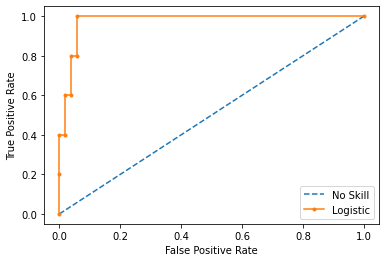

In [75]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(),rtca_target.to_numpy(),test_size=0.2,random_state=42,shuffle=True)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

Logistic: f1=0.000 auc=0.788


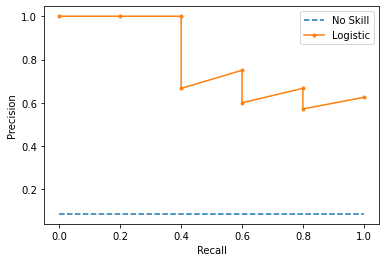

[I 2021-06-10 07:56:58,236] Trial 8 finished with value: 0.16080808080808082 and parameters: {'n_estimators': 250, 'max_depth': 16, 'colsample_bylevel': 0.7, 'max_bin': 127, 'eta': 0.2, 'subsample': 1.0}. Best is trial 1 with value: 0.3905050505050506.


Starting fit
Starting fit


[I 2021-06-10 08:06:04,241] Trial 6 finished with value: 0.8853716954879746 and parameters: {'n_estimators': 450, 'max_depth': 16, 'colsample_bylevel': 0.6, 'max_bin': 511, 'eta': 0.05, 'subsample': 0.8}. Best is trial 12 with value: 0.9069347900161853.
[I 2021-06-10 08:06:55,138] Trial 30 finished with value: 0.27936507936507937 and parameters: {'n_estimators': 300, 'max_depth': 16, 'colsample_bylevel': 0.9, 'max_bin': 127, 'eta': 0.1, 'subsample': 0.8}. Best is trial 95 with value: 0.5498148909913616.


Starting fit


[I 2021-06-10 08:17:17,996] Trial 2 finished with value: 0.30569430569430567 and parameters: {'n_estimators': 450, 'max_depth': 16, 'colsample_bylevel': 1.0, 'max_bin': 511, 'eta': 0.2, 'subsample': 0.9}. Best is trial 95 with value: 0.5498148909913616.


In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
testy = y_test
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()